<a href="https://colab.research.google.com/github/21pa1a0536/ECommerce_DS_Assignment_Zeotap/blob/main/E_Insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load Datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

uploaded = files.upload()

Saving Products.csv to Products.csv
Saving Transactions.csv to Transactions.csv
Saving Customers.csv to Customers.csv


In [2]:
#Display Data Overview

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print("Customers Data:")
print(customers.head())

print("\nProducts Data:")
print(products.head())

print("\nTransactions Data:")
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [3]:
#Checking for Missing Values

print("\nMissing Values in Customers:")
print(customers.isnull().sum())
print("\nMissing Values in Products:")
print(products.isnull().sum())
print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [4]:
#Converting Date Columns to Proper Format

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

#Merging Datasets for a Unified View

merged_df = transactions.merge(customers, on='CustomerID', how='left')
merged_df = merged_df.merge(products, on='ProductID', how='left')

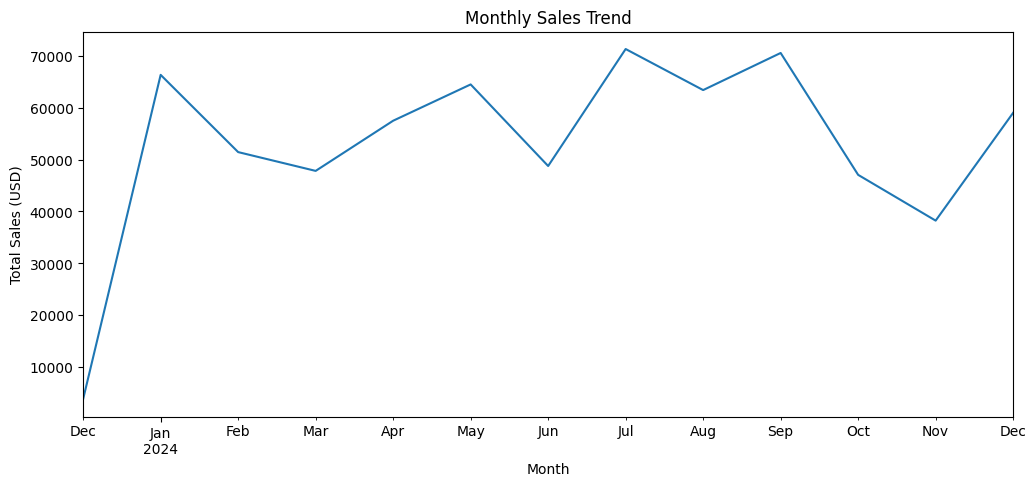

In [5]:
#Analyzing Sales Trend Over Time

plt.figure(figsize=(12, 5))
merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum().plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.show()

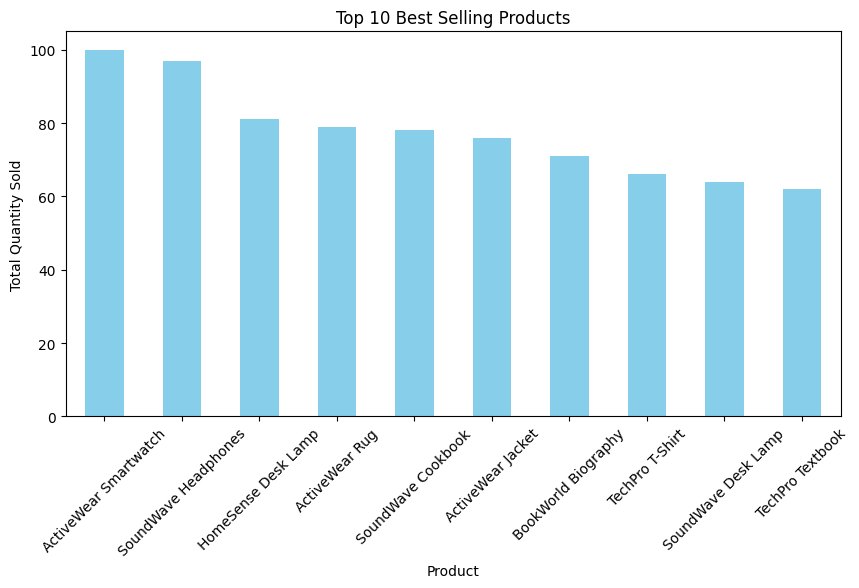

In [6]:
#Identifying Top Selling Products

top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

<ipython-input-7-79ebff053d5c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


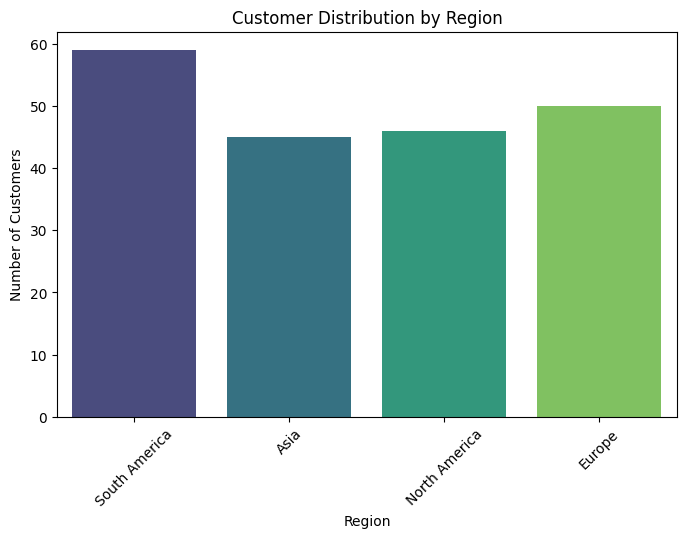

In [7]:
# Visualizing Customer Distribution by Region

plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [8]:
#Finally, Deriving Key Business Insights

business_insights = '''
1. Seasonal Trends: Sales peak during specific months, indicating seasonal trends that businesses can leverage for promotions.
2. Popular Products: The top 10 products contribute to a significant portion of total sales, meaning focusing on these can maximize profits.
3. Customer Demographics: Certain regions have higher customer concentrations, allowing targeted marketing strategies.
4. High-Value Customers: A small percentage of customers contribute to the majority of sales, making loyalty programs beneficial.
5. Signup Patterns: Customer sign-ups show trends, suggesting the effectiveness of past marketing campaigns.
'''
print(business_insights)


1. Seasonal Trends: Sales peak during specific months, indicating seasonal trends that businesses can leverage for promotions.
2. Popular Products: The top 10 products contribute to a significant portion of total sales, meaning focusing on these can maximize profits.
3. Customer Demographics: Certain regions have higher customer concentrations, allowing targeted marketing strategies.
4. High-Value Customers: A small percentage of customers contribute to the majority of sales, making loyalty programs beneficial.
5. Signup Patterns: Customer sign-ups show trends, suggesting the effectiveness of past marketing campaigns.



In [ ]:
#Lookalike Model - Fpr Customer Similarity Analysis

In [9]:
#Preparing Data for Similarity Computation

from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [10]:
#Identifying the correct 'Price' column

if 'Price_y' in merged_df.columns:
    merged_df.rename(columns={'Price_y': 'Price'}, inplace=True)
elif 'Price_x' in merged_df.columns:
    merged_df.rename(columns={'Price_x': 'Price'}, inplace=True)

customer_features = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean'
}).reset_index()

In [11]:
#Standardizing the feature values and Computing Similarity Matrix

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'Price']])

similarity_matrix = cosine_similarity(scaled_features)

In [12]:
#Find Top 3 Similar Customers for Each Target Customer

def get_top_similar_customers(customer_index, top_n=3):
    sim_scores = list(enumerate(similarity_matrix[customer_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    return [(customer_features.iloc[i[0]]['CustomerID'], i[1]) for i in sim_scores]

In [13]:
#Generating Lookalike.csv for First 20 Customers

lookalike_dict = {}
for i in range(20):  # First 20 customers
    cust_id = customer_features.iloc[i]['CustomerID']
    lookalike_dict[cust_id] = get_top_similar_customers(i)

In [14]:
# Converting to DataFrame and Saving

import os

lookalike_df = pd.DataFrame([(k, v[0][0], v[0][1], v[1][0], v[1][1], v[2][0], v[2][1])
                              for k, v in lookalike_dict.items()],
                             columns=['CustomerID', 'Similar_Cust1', 'Score1', 'Similar_Cust2', 'Score2', 'Similar_Cust3', 'Score3'])

# Ensure directory exists before saving
save_path = '/content/drive/My Drive/Dataset/'
os.makedirs(save_path, exist_ok=True)

lookalike_df.to_csv(save_path + 'Lookalike.csv', index=False)
print("Lookalike Model Results Saved Successfully!")


Lookalike Model Results Saved Successfully!


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Merging Customer Data with Transaction Data
customer_transactions = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spend by each customer
    'Quantity': 'sum',    # Total quantity purchased by each customer
    'Price': 'mean'      # Average price of products purchased
}).reset_index()


In [16]:
# Feature Engineering: Creating meaningful features from transaction data
customer_transactions['AvgTransactionValue'] = customer_transactions['TotalValue'] / customer_transactions['Quantity']

# Adding Customer Profile Features
customer_profiles = customers[['CustomerID', 'Region']]
customer_data = customer_transactions.merge(customer_profiles, on='CustomerID', how='left')

In [17]:
# Standardizing the features
features = ['TotalValue', 'Quantity', 'Price', 'AvgTransactionValue']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[features])

In [18]:
# Applying KMeans Clustering with different cluster numbers

inertia = []
db_indexes = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)

    # Storing inertia (sum of squared distances to the nearest cluster center) and DB Index
    inertia.append(kmeans.inertia_)
    db_indexes.append(davies_bouldin_score(scaled_data, kmeans.labels_))


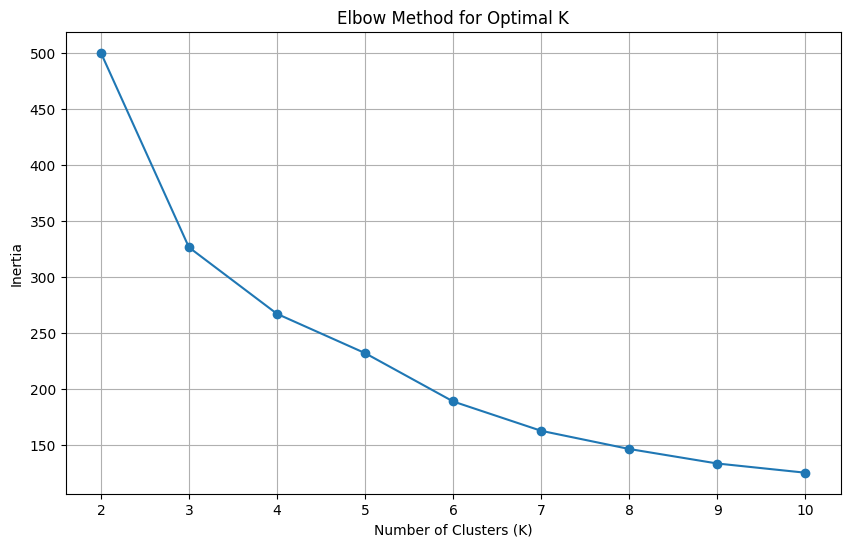

In [19]:
# Plotting the Elbow Curve for optimal K
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', label='Inertia')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

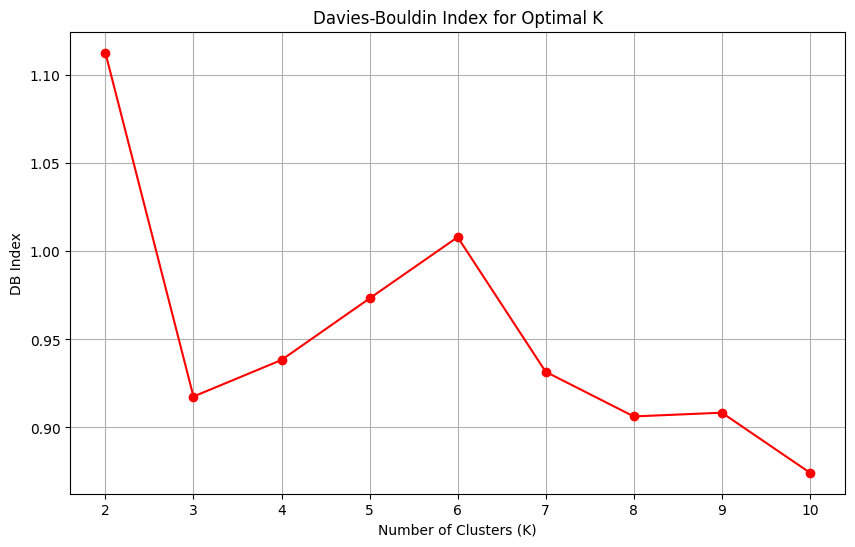

In [20]:
# Plotting DB Index for optimal K
plt.figure(figsize=(10, 6))
plt.plot(k_range, db_indexes, marker='o', color='r', label='DB Index')
plt.title('Davies-Bouldin Index for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('DB Index')
plt.grid(True)
plt.show()

In [21]:
# Final KMeans with optimal clusters
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)


In [22]:
# Visualizing the clusters using PCA (for 2D plot)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

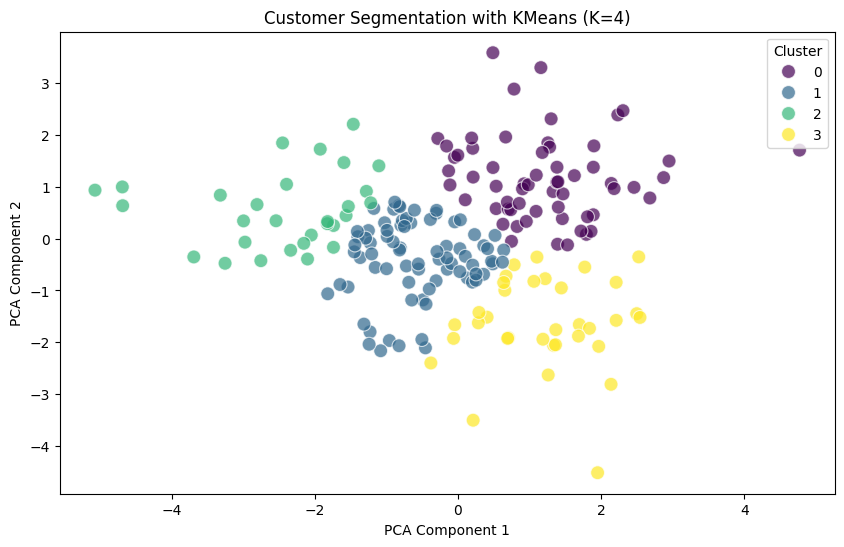

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_data['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation with KMeans (K=4)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [24]:
# Summary of clusters
cluster_summary = customer_data.groupby('Cluster').agg({
    'TotalValue': 'mean',
    'Quantity': 'mean',
    'Price': 'mean',
    'AvgTransactionValue': 'mean'
}).reset_index()

print("Cluster Summary:")
print(cluster_summary)


Cluster Summary:
   Cluster   TotalValue   Quantity       Price  AvgTransactionValue
0        0  5610.532167  20.066667  278.253817           282.628976
1        1  2556.469605   9.973684  266.065606           260.682052
2        2  1512.449310   9.137931  163.937003           156.584786
3        3  3388.556176   9.117647  364.960032           375.869196


In [25]:
# Calculating DB Index for the final clustering

final_db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
print(f"Final DB Index: {final_db_index}")

Final DB Index: 0.9383115186410536
